# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [1]:
import pandas as pd
%matplotlib inline

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [2]:
type(pd.read_excel("richpeople.xlsx"))

pandas.core.frame.DataFrame

In [3]:
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [4]:
df.shape

(1653, 30)

In [5]:
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


In [6]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [7]:
df[['name','networthusbillion']].sort_values(by='networthusbillion', ascending=False).head(10)

,name,networthusbillion
184,Bill Gates,76.0
226,Carlos Slim Helu,72.0
79,Amancio Ortega,64.0
1562,Warren Buffett,58.2
862,Larry Ellison,48.0
339,David Koch,40.0
247,Charles Koch,40.0
1364,Sheldon Adelson,38.0
280,Christy Walton,36.7
724,Jim Walton,34.7


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
>
> **TIP:** When I say "average," you can pick what kind of average you use.

In [8]:
df.gender.value_counts() 

male      1473
female     180
Name: gender, dtype: int64

In [9]:
df.gender.value_counts(normalize=True)

male      0.891107
female    0.108893
Name: gender, dtype: float64

In [10]:
df.gender.value_counts(1).round(3)

male      0.891
female    0.109
Name: gender, dtype: float64

In [11]:
df.gender.value_counts('anytextatall').round(1)

male      0.9
female    0.1
Name: gender, dtype: float64

In [12]:
df.groupby(by='gender').networthusbillion.mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [24]:
df.typeofwealth.value_counts().sort_values(ascending=False)

inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
Name: typeofwealth, dtype: int64

In [27]:
df.groupby(by='gender').typeofwealth.value_counts()

gender  typeofwealth            
female  inherited                   142
        founder non-finance          21
        executive                     6
        self-made finance             6
        privatized and resources      5
male    founder non-finance         446
        inherited                   364
        self-made finance           338
        privatized and resources    187
        executive                   136
Name: typeofwealth, dtype: int64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

In [15]:
df.company.value_counts().sort_values(ascending=False).head(12)

Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Votorantim Group        6
Cargill                 6
Walmart                 6
Alfa Group              6
Glencore Xstrata        5
Samsung                 5
Benckiser               5
Tingyi                  5
Maxingvest AG           5
Name: company, dtype: int64

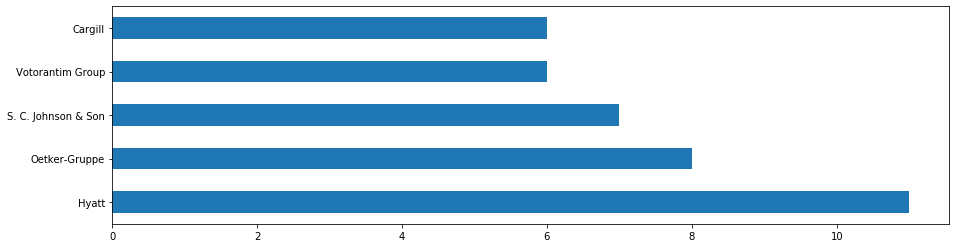

In [16]:
df.company.value_counts().sort_values(ascending=False).head(5).plot(kind='barh', figsize=(15,4))

## 7) How much money do these billionaires have in total?

In [17]:
allbill = df.networthusbillion.sum() * 1000000000
print(f"${int(allbill):,}")

$6,454,400,000,000


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [18]:
df.groupby(by='citizenship').networthusbillion.sum().sort_values(ascending=False).head(10)

citizenship
United States     2322.4
Russia             422.5
Germany            401.4
China              375.8
France             235.3
Hong Kong          213.7
Brazil             192.2
India              191.9
Italy              158.1
United Kingdom     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [19]:
df.age.mean().round(1)

63.3

In [20]:
df.groupby(by='selfmade').age.mean().round(1)

selfmade
inherited    65.0
self-made    62.6
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

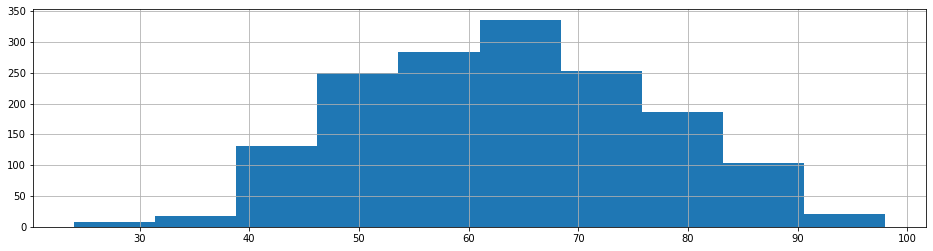

In [21]:
df.age.hist(figsize=(16,4))

## 11) Make a scatterplot of net worth compared to age

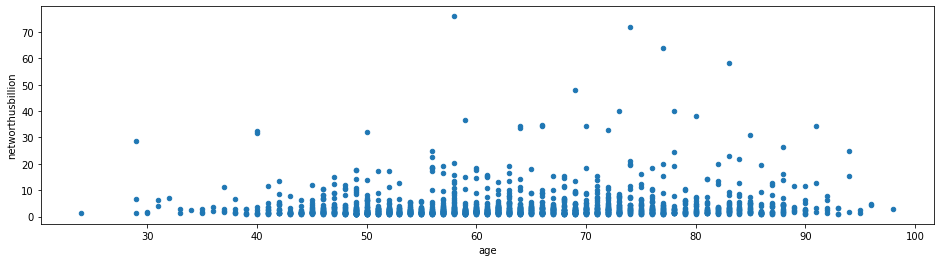

In [22]:
df.plot(x='age', y= 'networthusbillion', kind='scatter', figsize=(16,4))

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

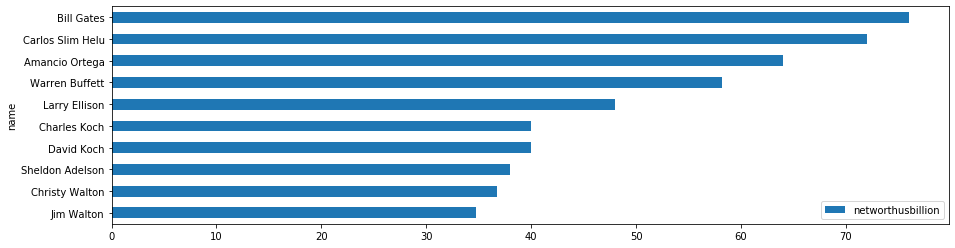

In [23]:
df.sort_values(by='networthusbillion', ascending=True).tail(10) \
    .plot(x='name', y= 'networthusbillion', kind='barh', figsize=(15,4))